In [1]:
import argparse
import numpy as np
import scipy as sp
import json
from matplotlib import pyplot as plt

from scipy.spatial import procrustes
from scipy.linalg import orthogonal_procrustes

In [2]:
def read_json(file_path):
	file = open(file_path)
	json_file = json.load(file)
	file.close()
	return json_file

In [3]:
def get_positions(poses):
	view_matrices = [np.array(cam["extrinsics"]["view_matrix"]).reshape((4, 4)) for cam in poses["cameras"]]
	
	positions = np.vstack([-np.dot(view[:3, :3].T, view[:3, 3]) for view in view_matrices])

	center = positions.mean(axis=0)
	positions -= center

	norm = np.linalg.norm(positions.flatten())
	positions /= norm

	return positions

In [4]:
p1 = read_json("/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/calibration_test.json")
p2 = read_json("/data/student_kaempchen/ed3dgs-data/vci/2024_12_12_dynamic3/calibration_dome.json")

positions1 = get_positions(p1)
positions2 = get_positions(p2)

In [13]:
#m1, m2, disparity = procrustes(positions1, positions2)

#m2 /= np.linalg.norm(m2.flatten())
#print(disparity)

R, _ = orthogonal_procrustes(positions1, positions2)

print(R)
print(np.linalg.det(R))

A = positions1 @ R
B = positions2

# A, B, _ = procrustes(positions1, positions2)

print(np.linalg.norm(np.abs(A - B).flatten()))

[[-0.12081471 -0.02106435  0.99245156]
 [ 0.98127631 -0.1536091   0.11619402]
 [ 0.15000204  0.98790715  0.03922819]]
0.9999999999999989
0.0937960891862713


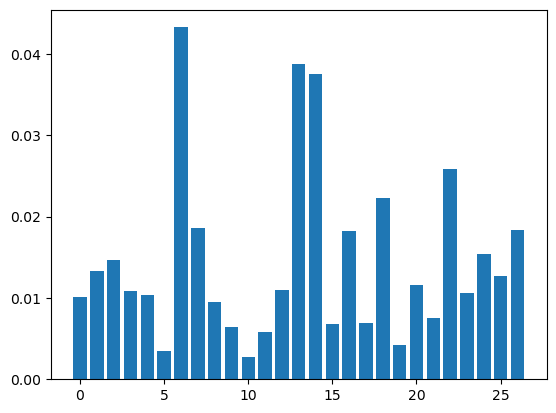

In [14]:
plt.bar(np.arange(A.shape[0]), np.linalg.norm(np.abs(B - A), axis=1))
plt.show()

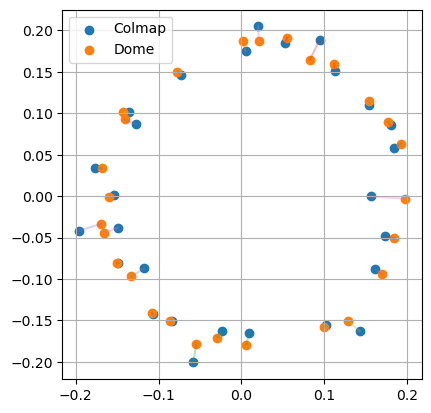

In [15]:
plt.scatter(A[:,1], A[:,2], label="Colmap")
plt.scatter(B[:,1], B[:,2], label="Dome")

pairs = np.c_[A[:, [1,2]], B[:,[1,2]]]
plt_args = pairs.reshape(-1, 2, 2).swapaxes(1, 2).reshape(-1, 2)
plt.plot(*plt_args, alpha=0.3)
plt.legend()
plt.grid()
plt.gca().set_aspect("equal")
plt.show()

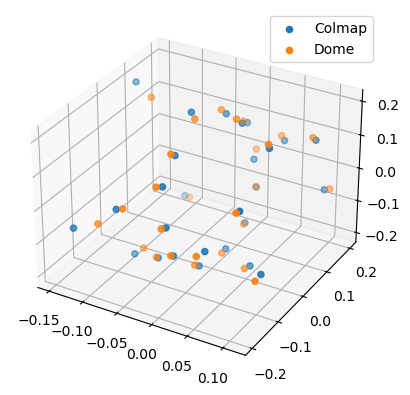

In [16]:
ax = plt.subplot(projection="3d")

ax.scatter(A[:,0], A[:,1], A[:,2], label="Colmap")
ax.scatter(B[:,0], B[:,1], B[:,2], label="Dome")
ax.legend()
plt.show()